This notebook includes data prep and execution of baseline model. Notebook is now built for book class since there is no ready to use train / test set.

### Data Prep

In [3]:
# import libraries
import os
import pandas as pd
import json
import gzip
import fasttext 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Book files
#path = '../../src/data/schemafiltereddata/Book'
#files = [file for file in os.listdir(path) if file.endswith('.json.gz')]

In [89]:
# Small train set
path = '../../src/data/schemafiltereddata/TrainTestTables/Small/Train'
files = [file for file in os.listdir(path) if file.endswith('.json.gz')]

In [99]:
# Small test set
path = '../../src/data/schemafiltereddata/TrainTestTables/Small/Test'
files = [file for file in os.listdir(path) if file.endswith('.json.gz')]

In [66]:
len(files)

394

In [12]:
Product = ['name',
 'offers',
 'brand',
 'aggregaterating',
 'mpn',
 'category',
 'review',
 'manufacturer',
 'itemcondition',
 'model',
 'weight',
 'price',
 'gtin13',
 'releasedate',
 'color',
 'mainentityofpage',
 'isrelatedto',
 'gtin12',
 'pricecurrency',
 'width',
 'height',
 'additionalproperty',
 'depth',
 'gtin8',
 'gtin',
 'identifier',
 'availability',
 'gtin14',
 'shop-currency',
 'reviewcount',
 'ratingvalue',
 'issimilarto',
 'itemlistelement',
 'bestrating',
 'condition',
 'worstrating',
 'alternatename',
 'audience',
 'breadcrumb',
 'material',
 'disambiguatingdescription',
 'title',
 'address',
 'author',
 'offerdetails',
 'reviews',
 'geo',
 'datepublished']

In [13]:
CreativeWork = ['headline',
 'author',
 'datepublished',
 'datemodified',
 'name',
 'publisher',
 'mainentityofpage',
 'interactionstatistic',
 'datecreated',
 'alternativeheadline',
 'keywords',
 'articlebody',
 'aggregaterating',
 'interactioncount',
 'inlanguage',
 'commentcount',
 'interactiontype',
 'creator',
 'genre',
 'version',
 'offers',
 'copyrightholder',
 'copyrightyear']

In [14]:
Event = ['name',
 'enddate',
 'location',
 'performer',
 'organizer',
 'eventstatus',
 'eventattendancemode',
 'duration',
 'doortime',
 'typicalagerange',
 'performers']

In [15]:
MusicRecording = ['name',
 'duration',
 'byartist',
 'inalbum',
 'datepublished',
 'genre',
 'datecreated']

In [16]:
LocalBusiness = ['name',
 'address',
 'telephone',
 'geo',
 'pricerange',
 'aggregaterating',
 'email',
 'sameas',
 'faxnumber',
 'openinghours',
 'openinghoursspecification',
 'review',
 'contactpoint',
 'legalname',
 'areaserved',
 'location',
 'addresslocality',
 'addressregion',
 'streetaddress',
 'postalcode',
 'paymentaccepted',
 'founder',
 'citystatezip',
 'owns',
 'hasmap']

In [20]:
Recipe = ['name',
 'recipeinstructions',
 'author',
 'recipeyield',
 'recipeingredient',
 'preptime',
 'cooktime',
 'datepublished',
 'totaltime',
 'recipecategory',
 'recipecuisine',
 'aggregaterating',
 'keywords',
 'nutrition',
 'mainentityofpage',
 'ispartof',
 'ingredients',
 'performtime',
 'cookingmethod',
 'review',
 'suitablefordiet',
 'datemodified',
 'publisher',
 'headline']

In [19]:
Person = ['mainentityofpage',
 'jobtitle',
 'birthdate',
 'givenname',
 'familyname',
 'telephone',
 'email',
 'deathdate',
 'additionalname',
 'gender',
 'worksfor',
 'height',
 'address',
 'nationality',
 'weight',
 'affiliation',
 'homelocation',
 'knowslanguage',
 'makesoffer',
 'sameas',
 'birthplace',
 'memberof',
 'faxnumber',
 'worklocation',
 'contactpoint']

In [21]:
Place = ['name', 'geo', 'telephone', 'sameas', 'openinghoursspecification']

In [22]:
Book = ['name',
 'author',
 'isbn',
 'publisher',
 'offers',
 'datepublished',
 'numberofpages',
 'bookformat',
 'inlanguage',
 'genre',
 'aggregaterating',
 'bookedition']

In [23]:
Restaurant = ['name',
 'address',
 'telephone',
 'servescuisine',
 'geo',
 'pricerange',
 'aggregaterating',
 'hasmenu',
 'acceptsreservations',
 'openinghoursspecification',
 'openinghours',
 'menu']

In [24]:
Hotel = ['name',
 'address',
 'telephone',
 'pricerange',
 'geo',
 'aggregaterating',
 'starrating',
 'email']

In [25]:
MusicAlbum = ['name', 'byartist', 'track', 'numtracks']

In [26]:
TVEpisode = ['name', 'partofseries', 'episodenumber']

In [100]:
# creation of general dataframe to hold data
tables = pd.DataFrame(columns=['text', 'name', 'class'])

In [35]:
d = {'Product': Product, 'CreativeWork': CreativeWork, 'Event': Event, 'MusicRecording': MusicRecording, 
     'LocalBusiness': LocalBusiness, 'Recipe': Recipe, 'Person': Person, 'Place': Place, 'Book': Book, 
     'Restaurant': Restaurant, 'Hotel': Hotel, 'MusicAlbum': MusicAlbum, 'TVEpisode': TVEpisode}

In [101]:
# gets concatenated rows of target columns
# muss eig noch mal fingetuned werden mit prüfung aus welcher kategorie es kommt
for file in files:
    # read file
    df = pd.read_json(os.path.join(path, '{}'.format(file)), compression='gzip', lines=True)
    
    # look for target columns
    for target in d[file.split('_')[0]]:
        if target in df.columns:
            print(target)
            print(df.columns)
            df[target] = df[target].fillna(' ')
            try:
                tables = tables.append({'text': ' '.join(df[target].tolist()), 'name': target, 'class': file.split('_')[0]}, ignore_index=True)
            except:
                tables = tables.append({'text': ','.join(str(v) for v in df[target]), 'name': target, 'class': file.split('_')[0]}, ignore_index=True)
            #book_tables.append({'text': ''.join(map(str, df[target])), 'name': target}, ignore_index=True)

name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'manufacturer', 'weight', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'manufacturer', 'weight', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'manufacturer', 'weight', 'page_url'],
      dtype='object')
manufacturer
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'manufacturer', 'weight', 'page_url'],
      dtype='object')
weight
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'manufacturer', 'weight', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'numtracks', 'track', 'page_url'], dtype='object')
track
Index(['row_id', 'name', 'numtracks', 'track', 'page_url'], dtype='object')
numtracks
Index(['row_id', 'name', 'numtracks', 'track', 'page_url'], dtype='object')
name
Index(['row_id', 'address', 'name', 't

pricerange
Index(['row_id', 'name', 'address', 'telephone', 'geo', 'servescuisine',
       'pricerange', 'url', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'recipeinstructions', 'author', 'recipeingredient',
       'recipeyield', 'datepublished', 'preptime', 'recipecategory',
       'recipecuisine', 'keywords', 'mainentityofpage', 'ispartof',
       'page_url'],
      dtype='object')
recipeinstructions
Index(['row_id', 'name', 'recipeinstructions', 'author', 'recipeingredient',
       'recipeyield', 'datepublished', 'preptime', 'recipecategory',
       'recipecuisine', 'keywords', 'mainentityofpage', 'ispartof',
       'page_url'],
      dtype='object')
author
Index(['row_id', 'name', 'recipeinstructions', 'author', 'recipeingredient',
       'recipeyield', 'datepublished', 'preptime', 'recipecategory',
       'recipecuisine', 'keywords', 'mainentityofpage', 'ispartof',
       'page_url'],
      dtype='object')
recipeyield
Index(['row_id', 'name', 'recipeinstructio

name
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
duration
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
byartist
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
inalbum
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand', 'mpn',
       'model', 'manufacturer', 'releasedate', 'color', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand', 'mpn',
       'model', 'manufacturer', 'releasedate', 'color', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand', 'mpn',
       'model', 'manufacturer', 'releasedate', 'color', 'page_url'],
      dtype='object')
mpn
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand', 'mpn'

name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand',
       'aggregaterating', 'productid', 'mpn', 'model', 'manufacturer',
       'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand',
       'aggregaterating', 'productid', 'mpn', 'model', 'manufacturer',
       'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand',
       'aggregaterating', 'productid', 'mpn', 'model', 'manufacturer',
       'page_url'],
      dtype='object')
aggregaterating
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand',
       'aggregaterating', 'productid', 'mpn', 'model', 'manufacturer',
       'page_url'],
      dtype='object')
mpn
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand',
       'aggregaterating', 'productid', 'mpn', 'model', 'manufacturer',
       'page_url'],
      dtype='object')
manufacturer
Index(['row_id', 'n

review
Index(['row_id', 'name', 'offers', 'sku', 'brand', 'aggregaterating', 'review',
       'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'aggregaterating', 'mpn', 'review', 'gtin13', 'gtin8', 'gtin14',
       'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'aggregaterating', 'mpn', 'review', 'gtin13', 'gtin8', 'gtin14',
       'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'aggregaterating', 'mpn', 'review', 'gtin13', 'gtin8', 'gtin14',
       'page_url'],
      dtype='object')
aggregaterating
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'aggregaterating', 'mpn', 'review', 'gtin13', 'gtin8', 'gtin14',
       'page_url'],
      dtype='object')
mpn
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'aggregaterating', 'mpn', 'review', 'gti

bookformat
Index(['row_id', 'name', 'author', 'publisher', 'isbn', 'bookformat',
       'datepublished', 'numberofpages', 'inlanguage', 'bookedition',
       'keywords', 'alternativeheadline', 'page_url'],
      dtype='object')
inlanguage
Index(['row_id', 'name', 'author', 'publisher', 'isbn', 'bookformat',
       'datepublished', 'numberofpages', 'inlanguage', 'bookedition',
       'keywords', 'alternativeheadline', 'page_url'],
      dtype='object')
bookedition
Index(['row_id', 'name', 'author', 'publisher', 'isbn', 'bookformat',
       'datepublished', 'numberofpages', 'inlanguage', 'bookedition',
       'keywords', 'alternativeheadline', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
duration
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
byartist
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
inalbum
Index(['row_id', 

offers
Index(['row_id', 'name', 'author', 'publisher', 'isbn', 'offers', 'page_url'], dtype='object')
name
Index(['row_id', 'name', 'recipeinstructions', 'author', 'description',
       'recipeingredient', 'recipeyield', 'datepublished', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
       'aggregaterating', 'keywords', 'nutrition', 'page_url'],
      dtype='object')
recipeinstructions
Index(['row_id', 'name', 'recipeinstructions', 'author', 'description',
       'recipeingredient', 'recipeyield', 'datepublished', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
       'aggregaterating', 'keywords', 'nutrition', 'page_url'],
      dtype='object')
author
Index(['row_id', 'name', 'recipeinstructions', 'author', 'description',
       'recipeingredient', 'recipeyield', 'datepublished', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
       'aggregaterating', 'keywords', 'nutrition', 'page_url'],
 

name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'category', 'productid', 'mpn', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'category', 'productid', 'mpn', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'category', 'productid', 'mpn', 'page_url'],
      dtype='object')
mpn
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'category', 'productid', 'mpn', 'page_url'],
      dtype='object')
category
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'category', 'productid', 'mpn', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
duration
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
byartist
Index(['row_id', 'name'

name
Index(['row_id', 'name', 'sku', 'brand', 'model', 'manufacturer',
       'releasedate', 'price', 'color', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'sku', 'brand', 'model', 'manufacturer',
       'releasedate', 'price', 'color', 'page_url'],
      dtype='object')
manufacturer
Index(['row_id', 'name', 'sku', 'brand', 'model', 'manufacturer',
       'releasedate', 'price', 'color', 'page_url'],
      dtype='object')
model
Index(['row_id', 'name', 'sku', 'brand', 'model', 'manufacturer',
       'releasedate', 'price', 'color', 'page_url'],
      dtype='object')
price
Index(['row_id', 'name', 'sku', 'brand', 'model', 'manufacturer',
       'releasedate', 'price', 'color', 'page_url'],
      dtype='object')
releasedate
Index(['row_id', 'name', 'sku', 'brand', 'model', 'manufacturer',
       'releasedate', 'price', 'color', 'page_url'],
      dtype='object')
color
Index(['row_id', 'name', 'sku', 'brand', 'model', 'manufacturer',
       'releasedate', 'price', 'co

recipeinstructions
Index(['row_id', 'name', 'recipeinstructions', 'description', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
       'ingredients', 'page_url'],
      dtype='object')
preptime
Index(['row_id', 'name', 'recipeinstructions', 'description', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
       'ingredients', 'page_url'],
      dtype='object')
cooktime
Index(['row_id', 'name', 'recipeinstructions', 'description', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
       'ingredients', 'page_url'],
      dtype='object')
totaltime
Index(['row_id', 'name', 'recipeinstructions', 'description', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
       'ingredients', 'page_url'],
      dtype='object')
recipecategory
Index(['row_id', 'name', 'recipeinstructions', 'description', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
     

name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'category',
       'manufacturer', 'color', 'width', 'height', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'category',
       'manufacturer', 'color', 'width', 'height', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'category',
       'manufacturer', 'color', 'width', 'height', 'page_url'],
      dtype='object')
category
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'category',
       'manufacturer', 'color', 'width', 'height', 'page_url'],
      dtype='object')
manufacturer
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'category',
       'manufacturer', 'color', 'width', 'height', 'page_url'],
      dtype='object')
color
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'category',
       'manufacturer', 'color', 'width', 'height', 'page

name
Index(['row_id', 'name', 'offers', 'description', 'url', 'brand', 'category',
       'productid', 'itemcondition', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'url', 'brand', 'category',
       'productid', 'itemcondition', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'url', 'brand', 'category',
       'productid', 'itemcondition', 'page_url'],
      dtype='object')
category
Index(['row_id', 'name', 'offers', 'description', 'url', 'brand', 'category',
       'productid', 'itemcondition', 'page_url'],
      dtype='object')
itemcondition
Index(['row_id', 'name', 'offers', 'description', 'url', 'brand', 'category',
       'productid', 'itemcondition', 'page_url'],
      dtype='object')
headline
Index(['row_id', 'headline', 'text', 'author', 'datepublished', 'datemodified',
       'name', 'publisher', 'image', 'mainentityofpage', 'page_url'],
      dtype='object')
author
Index(['row_id', 'hea

duration
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
byartist
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
inalbum
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
jobtitle
Index(['row_id', 'name', 'description', 'jobtitle', 'worksfor', 'nationality',
       'page_url'],
      dtype='object')
worksfor
Index(['row_id', 'name', 'description', 'jobtitle', 'worksfor', 'nationality',
       'page_url'],
      dtype='object')
nationality
Index(['row_id', 'name', 'description', 'jobtitle', 'worksfor', 'nationality',
       'page_url'],
      dtype='object')
givenname
Index(['row_id', 'description', 'givenname', 'familyname', 'additionalname',
       'deathdate', 'page_url'],
      dtype='object')
familyname
Index(['row_id', 'description', 'givenname', 'familyname', 'additionalname',
       'deathdate', 'page_url'],
      dtype='object')
deathdate
Index(['row_id', 'd

name
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
duration
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
byartist
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
inalbum
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand',
       'aggregaterating', 'mpn', 'review', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand',
       'aggregaterating', 'mpn', 'review', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand',
       'aggregaterating', 'mpn', 'review', 'page_url'],
      dtype='object')
aggregaterating
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'brand',
       'aggregaterating', 'mpn', 'review', 'page_url'

address
Index(['row_id', 'name', 'address', 'telephone', 'email', 'geo', 'description',
       'image', 'page_url'],
      dtype='object')
telephone
Index(['row_id', 'name', 'address', 'telephone', 'email', 'geo', 'description',
       'image', 'page_url'],
      dtype='object')
geo
Index(['row_id', 'name', 'address', 'telephone', 'email', 'geo', 'description',
       'image', 'page_url'],
      dtype='object')
email
Index(['row_id', 'name', 'address', 'telephone', 'email', 'geo', 'description',
       'image', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
duration
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
byartist
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
inalbum
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
headline
Index(['row_id', 'headline', 'text', 'author', 'date

name
Index(['row_id', 'name', 'author', 'datepublished', 'aggregaterating',
       'mainentityofpage', 'publisher', 'page_url'],
      dtype='object')
author
Index(['row_id', 'name', 'author', 'datepublished', 'aggregaterating',
       'mainentityofpage', 'publisher', 'page_url'],
      dtype='object')
datepublished
Index(['row_id', 'name', 'author', 'datepublished', 'aggregaterating',
       'mainentityofpage', 'publisher', 'page_url'],
      dtype='object')
aggregaterating
Index(['row_id', 'name', 'author', 'datepublished', 'aggregaterating',
       'mainentityofpage', 'publisher', 'page_url'],
      dtype='object')
mainentityofpage
Index(['row_id', 'name', 'author', 'datepublished', 'aggregaterating',
       'mainentityofpage', 'publisher', 'page_url'],
      dtype='object')
publisher
Index(['row_id', 'name', 'author', 'datepublished', 'aggregaterating',
       'mainentityofpage', 'publisher', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'offers', 'description', 

location
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'organizer', 'eventstatus', 'eventattendancemode', 'image', 'page_url'],
      dtype='object')
organizer
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'organizer', 'eventstatus', 'eventattendancemode', 'image', 'page_url'],
      dtype='object')
eventstatus
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'organizer', 'eventstatus', 'eventattendancemode', 'image', 'page_url'],
      dtype='object')
eventattendancemode
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'organizer', 'eventstatus', 'eventattendancemode', 'image', 'page_url'],
      dtype='object')
headline
Index(['row_id', 'headline', 'datepublished', 'datemodified', 'name',
       'description', 'inlanguage', 'copyrightyear', 'page_url'],
      dtype='object')
datepublished
Index(['row_id', 'headline', 'datepublished', 'datemodif

enddate
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'offers', 'organizer', 'page_url'],
      dtype='object')
location
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'offers', 'organizer', 'page_url'],
      dtype='object')
performer
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'offers', 'organizer', 'page_url'],
      dtype='object')
organizer
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'offers', 'organizer', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'address', 'telephone', 'email', 'description',
       'sameas', 'page_url'],
      dtype='object')
address
Index(['row_id', 'name', 'address', 'telephone', 'email', 'description',
       'sameas', 'page_url'],
      dtype='object')
telephone
Index(['row_id', 'name', 'address', 'telephone', 'email', 'description',
 

name
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
duration
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
byartist
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
inalbum
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'page_url'], dtype='object')
name
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'organizer', 'page_url'],
      dtype='object')
enddate
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'organizer', 'page_url'],
      dtype='object')
location
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'organizer', 'page_url'],
      dtype='object')
performer
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'organizer', 'page_url'],
      dtype='object')
organ

totaltime
Index(['row_id', 'name', 'recipeinstructions', 'author', 'description',
       'recipeingredient', 'recipeyield', 'datepublished', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
       'aggregaterating', 'keywords', 'nutrition', 'mainentityofpage',
       'ispartof', 'video', 'page_url'],
      dtype='object')
recipecategory
Index(['row_id', 'name', 'recipeinstructions', 'author', 'description',
       'recipeingredient', 'recipeyield', 'datepublished', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
       'aggregaterating', 'keywords', 'nutrition', 'mainentityofpage',
       'ispartof', 'video', 'page_url'],
      dtype='object')
recipecuisine
Index(['row_id', 'name', 'recipeinstructions', 'author', 'description',
       'recipeingredient', 'recipeyield', 'datepublished', 'preptime',
       'cooktime', 'totaltime', 'recipecategory', 'recipecuisine',
       'aggregaterating', 'keywords', 'nutrition', 'mainentityo

givenname
Index(['row_id', 'description', 'givenname', 'familyname', 'birthdate',
       'additionalname', 'deathdate', 'page_url'],
      dtype='object')
familyname
Index(['row_id', 'description', 'givenname', 'familyname', 'birthdate',
       'additionalname', 'deathdate', 'page_url'],
      dtype='object')
deathdate
Index(['row_id', 'description', 'givenname', 'familyname', 'birthdate',
       'additionalname', 'deathdate', 'page_url'],
      dtype='object')
additionalname
Index(['row_id', 'description', 'givenname', 'familyname', 'birthdate',
       'additionalname', 'deathdate', 'page_url'],
      dtype='object')
name
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'offers', 'eventstatus', 'eventattendancemode', 'image', 'page_url'],
      dtype='object')
enddate
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'offers', 'eventstatus', 'eventattendancemode', 'image', 'page_url'],
      dtype='object')
location
In

location
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'organizer', 'page_url'],
      dtype='object')
performer
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'organizer', 'page_url'],
      dtype='object')
organizer
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'organizer', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'url',
       'datepublished', 'page_url'],
      dtype='object')
duration
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'url',
       'datepublished', 'page_url'],
      dtype='object')
byartist
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'url',
       'datepublished', 'page_url'],
      dtype='object')
inalbum
Index(['row_id', 'name', 'duration', 'byartist', 'inalbum', 'url',
       'datepublished', 'page_url'],
      dtype='object')
date

releasedate
Index(['row_id', 'name', 'offers', 'description', 'url', 'brand', 'image',
       'category', 'releasedate', 'page_url'],
      dtype='object')
headline
Index(['row_id', 'headline', 'text', 'author', 'interactiontype',
       'userinteractioncount', 'page_url'],
      dtype='object')
author
Index(['row_id', 'headline', 'text', 'author', 'interactiontype',
       'userinteractioncount', 'page_url'],
      dtype='object')
interactiontype
Index(['row_id', 'headline', 'text', 'author', 'interactiontype',
       'userinteractioncount', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'itemcondition', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'itemcondition', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'itemcondition', 'page_url'],
      dtype='object')
mp

byartist
Index(['row_id', 'name', 'duration', 'byartist', 'page_url'], dtype='object')
jobtitle
Index(['row_id', 'name', 'image', 'description', 'jobtitle', 'email',
       'address', 'gender', 'page_url'],
      dtype='object')
email
Index(['row_id', 'name', 'image', 'description', 'jobtitle', 'email',
       'address', 'gender', 'page_url'],
      dtype='object')
gender
Index(['row_id', 'name', 'image', 'description', 'jobtitle', 'email',
       'address', 'gender', 'page_url'],
      dtype='object')
address
Index(['row_id', 'name', 'image', 'description', 'jobtitle', 'email',
       'address', 'gender', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'manufacturer', 'mainentityofpage', 'isbn', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'manufacturer', 'mainentityofpage', 'isbn', 'page_url'],
      dtype='object')
brand
Index(['row

name
Index(['row_id', 'name', 'address', 'telephone', 'email', 'starrating',
       'faxnumber', 'openinghours', 'paymentaccepted',
       'openinghoursspecification', 'containsplace', 'page_url'],
      dtype='object')
address
Index(['row_id', 'name', 'address', 'telephone', 'email', 'starrating',
       'faxnumber', 'openinghours', 'paymentaccepted',
       'openinghoursspecification', 'containsplace', 'page_url'],
      dtype='object')
telephone
Index(['row_id', 'name', 'address', 'telephone', 'email', 'starrating',
       'faxnumber', 'openinghours', 'paymentaccepted',
       'openinghoursspecification', 'containsplace', 'page_url'],
      dtype='object')
starrating
Index(['row_id', 'name', 'address', 'telephone', 'email', 'starrating',
       'faxnumber', 'openinghours', 'paymentaccepted',
       'openinghoursspecification', 'containsplace', 'page_url'],
      dtype='object')
email
Index(['row_id', 'name', 'address', 'telephone', 'email', 'starrating',
       'faxnumber', 'opening

offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'aggregaterating', 'mpn', 'review', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'aggregaterating', 'mpn', 'review', 'page_url'],
      dtype='object')
aggregaterating
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'aggregaterating', 'mpn', 'review', 'page_url'],
      dtype='object')
mpn
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'aggregaterating', 'mpn', 'review', 'page_url'],
      dtype='object')
review
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'image',
       'aggregaterating', 'mpn', 'review', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'url', 'image',
       'category', 'weight', 'releasedate', 'width', 'height', 'depth',
       'page_url'],
      dtype='object')
off

brand
Index(['row_id', 'name', 'offers', 'sku', 'brand', 'productid', 'mpn',
       'itemcondition', 'page_url'],
      dtype='object')
mpn
Index(['row_id', 'name', 'offers', 'sku', 'brand', 'productid', 'mpn',
       'itemcondition', 'page_url'],
      dtype='object')
itemcondition
Index(['row_id', 'name', 'offers', 'sku', 'brand', 'productid', 'mpn',
       'itemcondition', 'page_url'],
      dtype='object')
jobtitle
Index(['row_id', 'name', 'jobtitle', 'address', 'worksfor', 'page_url'], dtype='object')
worksfor
Index(['row_id', 'name', 'jobtitle', 'address', 'worksfor', 'page_url'], dtype='object')
address
Index(['row_id', 'name', 'jobtitle', 'address', 'worksfor', 'page_url'], dtype='object')
headline
Index(['row_id', 'headline', 'text', 'author', 'datepublished', 'datemodified',
       'name', 'publisher', 'image', 'mainentityofpage', 'page_url'],
      dtype='object')
author
Index(['row_id', 'headline', 'text', 'author', 'datepublished', 'datemodified',
       'name', 'publisher

review
Index(['row_id', 'name', 'offers', 'sku', 'url', 'brand', 'image', 'review',
       'price', 'pricecurrency', 'page_url'],
      dtype='object')
price
Index(['row_id', 'name', 'offers', 'sku', 'url', 'brand', 'image', 'review',
       'price', 'pricecurrency', 'page_url'],
      dtype='object')
pricecurrency
Index(['row_id', 'name', 'offers', 'sku', 'url', 'brand', 'image', 'review',
       'price', 'pricecurrency', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'offers', 'description', 'url', 'brand', 'image',
       'category', 'productid', 'manufacturer', 'identifier', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'url', 'brand', 'image',
       'category', 'productid', 'manufacturer', 'identifier', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'url', 'brand', 'image',
       'category', 'productid', 'manufacturer', 'identifier', 'page_url'],
      dtype='object')
cate

offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'gtin12', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'gtin12', 'page_url'],
      dtype='object')
mpn
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'gtin12', 'page_url'],
      dtype='object')
gtin12
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'gtin12', 'page_url'],
      dtype='object')
name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'aggregaterating', 'mpn', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'aggregaterating', 'mpn', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand',
       'aggregaterating', 'mpn', 'page_url'],
      dtype='object')
aggregaterating
Index(['row_id', 'name', 'offers', 'desc

name
Index(['row_id', 'name', 'address', 'telephone', 'geo', 'page_url'], dtype='object')
address
Index(['row_id', 'name', 'address', 'telephone', 'geo', 'page_url'], dtype='object')
telephone
Index(['row_id', 'name', 'address', 'telephone', 'geo', 'page_url'], dtype='object')
geo
Index(['row_id', 'name', 'address', 'telephone', 'geo', 'page_url'], dtype='object')
name
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'model', 'manufacturer', 'releasedate', 'color', 'page_url'],
      dtype='object')
offers
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'model', 'manufacturer', 'releasedate', 'color', 'page_url'],
      dtype='object')
brand
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'model', 'manufacturer', 'releasedate', 'color', 'page_url'],
      dtype='object')
mpn
Index(['row_id', 'name', 'offers', 'description', 'sku', 'brand', 'mpn',
       'model', 'manufacturer', 'releasedate',

brand
Index(['row_id', 'name', 'offers', 'brand', 'category', 'mpn', 'page_url'], dtype='object')
mpn
Index(['row_id', 'name', 'offers', 'brand', 'category', 'mpn', 'page_url'], dtype='object')
category
Index(['row_id', 'name', 'offers', 'brand', 'category', 'mpn', 'page_url'], dtype='object')
name
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'offers', 'organizer', 'page_url'],
      dtype='object')
enddate
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'offers', 'organizer', 'page_url'],
      dtype='object')
location
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'offers', 'organizer', 'page_url'],
      dtype='object')
performer
Index(['row_id', 'startdate', 'name', 'enddate', 'description', 'location',
       'performer', 'offers', 'organizer', 'page_url'],
      dtype='object')
organizer
Index(['row_id', 'startdate', 'name', 'enddate'

In [ ]:
# replace non alphanumeric signs ? -> }

#...

In [ ]:
# kick out non-english text?

#...

In [102]:
tables.head()

,text,name,class
0,Lunar Lexon 420 Bailey Alicanto Grande Estoril...,name,Product
1,"{'availability': 'OutOfStock', 'pricecurrency'...",offers,Product
2,Lunar Bailey Bailey Bailey Bailey Bailey Coach...,brand,Product
3,Lunar Bailey Bailey Bailey Bailey Bailey Coach...,manufacturer,Product
4,1150 KG 1624 KG 1669 KG 1082 KG 1669 KG 1760 K...,weight,Product


In [83]:
# beispiel von test small
#pd.read_json(os.path.join(path, '{}'.format(files[0])), compression='gzip', lines=True)
# warum sind teilweise columns gleich?

,row_id,name,offers,description,sku,brand,manufacturer,weight,page_url
0,0,Lunar Lexon 420,"{'availability': 'OutOfStock', 'pricecurrency'...",Lunar Lexon 420,LB11170,Lunar,Lunar,1150 KG,https://www.ladybaileycaravans.co.uk/details/1...
1,1,Bailey Alicanto Grande Estoril,"{'price': '27399', 'pricecurrency': 'GBP', 'de...",Save &pound;1665. Was &pound;29064. Now &pound...,153030,Bailey,Bailey,1624 KG,https://www.ladybaileycaravans.co.uk/details/1...
2,2,Bailey Pegasus Grande Messina,"{'pricevaliduntil': '2020-10-06', 'description...",Save &pound;1165. Was &pound;25564. Now &pound...,152870,Bailey,Bailey,1669 KG,https://www.ladybaileycaravans.co.uk/details/1...
3,3,Bailey Discovery D4-3,"{'price': '17399', 'description': 'Save &pound...",Save &pound;565. Was &pound;17964. Now &pound;...,NEW/2021,Bailey,Bailey,1082 KG,https://www.ladybaileycaravans.co.uk/details/1...
4,4,Bailey Pegasus Grande SE Messina,"{'pricecurrency': 'GBP', 'price': '25899', 'de...",Save &pound;565. Was &pound;26464. Now &pound;...,NEW/2021,Bailey,Bailey,1669 KG,https://www.ladybaileycaravans.co.uk/details/1...
5,5,Bailey Pegasus S4 Palermo,"{'availability': 'OutOfStock', 'pricecurrency'...",Bailey Pegasus S4 Palermo,LB11164,Bailey,Bailey,1760 KG,https://www.ladybaileycaravans.co.uk/details/1...
6,6,Coachman Pastiche 560/4,"{'pricevaliduntil': '2020-10-06', 'price': '15...",Coachman Pastiche 560/4,LB10896,Coachman,Coachman,1620 KG,https://www.ladybaileycaravans.co.uk/details/1...
7,7,Bailey Unicorn 4 Cadiz,"{'description': 'Bailey Unicorn 4 Cadiz', 'pri...",Bailey Unicorn 4 Cadiz,LB11163,Bailey,Bailey,1490 KG,https://www.ladybaileycaravans.co.uk/details/1...
8,8,Bailey Unicorn S2 Cadiz,"{'pricevaliduntil': '2020-10-06', 'pricecurren...",Bailey Unicorn S2 Cadiz,LB11139,Bailey,Bailey,1497 KG,https://www.ladybaileycaravans.co.uk/details/1...
9,9,Swift Conqueror 570,"{'availability': 'OutOfStock', 'description': ...",Swift Conqueror 570,LB10894,Swift,Swift,1634 KG,https://www.ladybaileycaravans.co.uk/details/1...


In [95]:
tables[tables.text.duplicated()]

,text,name,class
83,", , , , , , , ,{'datepublished': '2015-09-09T...",ispartof,Recipe
122,2020-09-16T00:04:10Z 2007-09-29T13:00:47Z 2006...,datecreated,CreativeWork
163,PT30M PT20M PT10M PT280M PT20M PT20M PT20M PT2...,totaltime,Recipe
175,2017-12-08 16:12:48 2017-06-23 15:18:23 2017-1...,datemodified,CreativeWork
176,IMG_6229 IMG_5561 IMG_8590 IMG_5485 IMG_5360 I...,name,CreativeWork
...,...,...,...
11721,"2020 World Cat 280cc-x - Corpus Christi, TX - ...",mainentityofpage,CreativeWork
11742,Organization Organization Organization Organiz...,performer,Event
11777,Keis Rocky Creek Designs Kriega WD-40 Moti...,manufacturer,Product
11788,Organization Organization Organization Organiz...,performer,Event


In [93]:
# duplicates -> why??
tables.text.duplicated().sum()

573

In [96]:
tables.shape

(11819, 3)

In [42]:
# kick duplicates out - could be inspected further - not always clear case to kick them out
#tableswod = tables[~tables.text.duplicated()]

In [44]:
#tableswod.shape

(11246, 2)

Distribution of relations is not even

In [98]:
#tables_train = tables

In [103]:
tables_test = tables

In [105]:
tables_train

,text,name,class
0,Bierwurst.com Cupids Dating Tips.com Ramsbury....,name,Product
1,"{'price': '12950', 'availability': 'https://sc...",offers,Product
2,Food and Drink Lifestyle > Dating Travel Desig...,category,Product
3,2020-09-16T02:57:04+01:00 2020-09-10T08:33:11+...,releasedate,Product
4,"[{'name': 'pa_internet-archive-age', 'value': ...",additionalproperty,Product
...,...,...,...
11814,"{'ratingvalue': '4.63', 'ratingcount': '8'},{'...",aggregaterating,Recipe
11815,Baked Keto mascarpone cheesecake Keto red curr...,keywords,Recipe
11816,"{'saturatedfatcontent': '17 g', 'servingsize':...",nutrition,Recipe
11817,{'description': 'A delicious low carb keto bak...,mainentityofpage,Recipe


In [108]:
tables_train.name.value_counts()/ len(tables_train)

name               0.158643
offers             0.076910
brand              0.062780
aggregaterating    0.043743
mpn                0.041036
                     ...   
copyrightholder    0.000169
itemlistelement    0.000085
offerdetails       0.000085
menu               0.000085
reviews            0.000085
Name: name, Length: 137, dtype: float64

In [107]:
tables_test.name.value_counts()/ len(tables_test)

name               0.157918
offers             0.073127
brand              0.062808
mpn                0.043517
aggregaterating    0.037685
                     ...   
worklocation       0.000449
alternatename      0.000449
suitablefordiet    0.000449
availability       0.000449
breadcrumb         0.000449
Name: name, Length: 130, dtype: float64

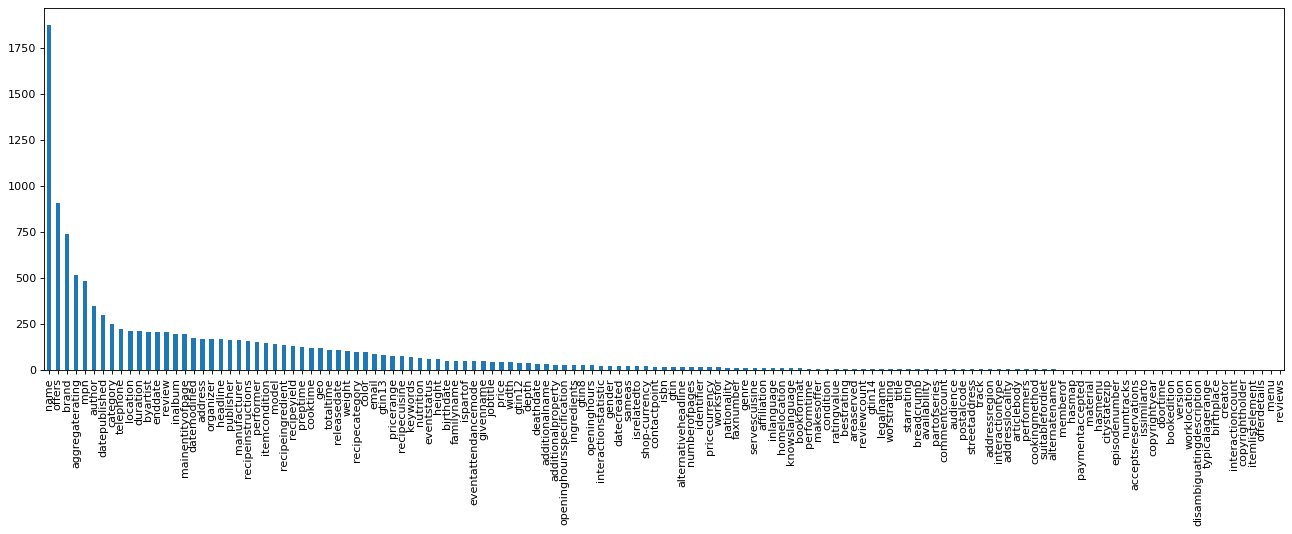

In [97]:
# small train with duplicates
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
tables.name.value_counts().plot(kind='bar')

plt.show()

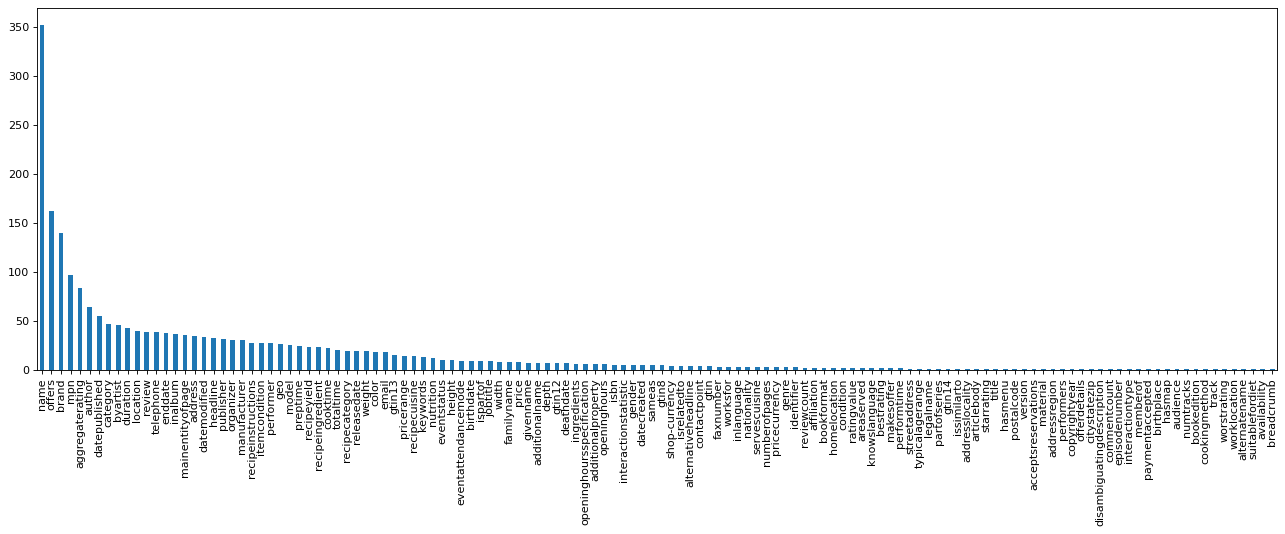

In [87]:
# small test with duplicates
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
tables.name.value_counts().plot(kind='bar')

plt.show()

In [110]:
tables_train.to_csv("../../src/data/schemafiltereddata/TrainTestTables/Small/Train/tables.csv")

In [88]:
tables_test.to_csv("../../src/data/schemafiltereddata/TrainTestTables/Small/Test/tables.csv")

### Model Prep

In [52]:
# 80 % train set, rest test set 

n = 80
train = tableswod.head(int(len(tableswod)*(n/100)))

In [54]:
test = tableswod.iloc[9437: ]

In [55]:
train.shape

(8996, 2)

In [56]:
test.shape

(1809, 2)

### Baseline model 

In [3]:
#!pip install simpletransformers

In [62]:
len(tableswod.name.unique())

136

In [63]:
from simpletransformers.classification import ClassificationModel

# Create a ClassificationModel
model = ClassificationModel('roberta', 'roberta-base', num_labels=136, use_cuda=False)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

How ot make it faster? -> model was imported with use_cuda = False -> is there a possibility to use it with server? -> how?

In [ ]:
model.train_model(train)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test)

In [2]:
! pip install tensorflow

     |████████████████████████████████| 489.6 MB 14 kB/s s eta 0:00:01    |████▉                           | 73.8 MB 50.6 MB/s eta 0:00:09��████                        | 124.0 MB 34.4 MB/s eta 0:00:11     |█████████████▉                  | 211.5 MB 56.2 MB/s eta 0:00:05     |██████████████▍                 | 219.3 MB 56.2 MB/s eta 0:00:05     |██████████████▉                 | 227.2 MB 56.2 MB/s eta 0:00:05     |███████████████████▍            | 297.0 MB 47.1 MB/s eta 0:00:05��████▉           | 319.2 MB 47.1 MB/s eta 0:00:04     |██████████████████████▋         | 345.4 MB 55.8 MB/s eta 0:00:03     |███████████████████████████▍    | 418.4 MB 56.6 MB/s eta 0:00:02     |████████████████████████████▌   | 436.3 MB 56.6 MB/s eta 0:00:01     |█████████████████████████████▏  | 445.7 MB 6.3 MB/s eta 0:00:07
     |████████████████████████████████| 42 kB 847 kB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 41.9 MB/s eta 0:00:01
     |████████████████████████████████| 13.4 MB 36.7 

In [4]:
# alternative approach
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
import tensorflow as tf

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = TFRobertaForSequenceClassification.from_pretrained('roberta-base')


ImportError: 
TFRobertaForSequenceClassification requires the TensorFlow library but it was not found in your environment. Checkout the instructions on the
installation page: https://www.tensorflow.org/install and follow the ones that match your environment.


In [ ]:
inputs = tokenizer("Hello, my dog is cute", return_tensors="tf")
inputs["labels"] = tf.reshape(tf.constant(1), (-1, 1)) # Batch size 1

outputs = model(inputs)
loss = outputs.loss
logits = outputs.logits